In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Fri Aug 26 18:55:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('Not using a high-RAM runtime')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
!pip install python-igraph
!pip install python-modularity-maximization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.1 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=7789b727f97c354899019156ef80cb487cf1c4dcb1f97a07f94821ff5cce5b54
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python-modularity-maximization (from versions: 0.0.1rc0, 0.0.1rc4, 0.0.1)
ERROR: No matching distribution found for python-modularity-maximization


In [ ]:
from pandas import json_normalize
import pickle
from pandas import json_normalize
import pandas as pd
import gzip
import json
import pandas as pd
import sklearn

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import json
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import igraph
from math import nan, isnan
import pandas as pd
import pylab
# Graph
import community
import networkx as nx

import community.community_louvain


# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

import re

import pandas as pd
import numpy as np
from itertools import combinations
import glob
import networkx as nx

'''from modularity_maximization import partition
from modularity_maximization.utils import get_modularity'''
from collections import Counter

import gc
#del pickl
gc.collect()

0

In [ ]:
def make_df(pickl):
    with open(pickl,'rb') as f:
        hashtag=pd.DataFrame()
        print("printing inside with open")
        b=pd.read_pickle(pickl)
        d=b.filter(['user.id_str','hashtags'], axis=1)
        #print(b.head(2))
        hashtag=hashtag.append(d)
            
        H=hashtag.copy()
        #print(H['hashtags'][:30])
        
        H['hashtags'] = H['hashtags'].dropna()
        #print(H['hashtags'][:2])
        H['hashtags']=H['hashtags'].fillna(0)
        list_Hashtags = H['hashtags'].tolist()

        '''result = []
        for tag in list_Hashtags:
            if tag not in result:  # check that we haven't seen the tag already (we know it doesn't contain punctuation at this point)
                result.append(tag)
        '''


        X=[x for x in list_Hashtags if x != 0] 



        Hh = nx.Graph()

        for L in X:
            for i in range(len(L)):
                for j in range(i,len(L)):
                    Hh.add_edge(L[i], L[j])
        #print(len(Hh.nodes))
        #Hh.remove_edges_from(list(nx.selfloop_edges(Hh)))
        outdeg = Hh.degree()
        to_remove = [n for (n,deg) in outdeg if outdeg[n] <= 10]
        Hh.remove_nodes_from(to_remove)

        #print('printing Hh nodes/edges',len(Hh.edges))
        #print(len(Hh.nodes))
        #print('printing giant components')
        
        Gcc = sorted(nx.connected_components(Hh), key=len, reverse=True)
        giantC = Hh.subgraph(Gcc[0])
        degrees_h = giantC.degree()
        
        
        comm_dict = community.community_louvain.best_partition(Hh)
        
        
        #top hashtags for labels:
        centers = {}
        communities = {}
        G_main_com = Hh.copy()
        min_nb = 10
        for com in set(comm_dict.values()) :
            list_nodes = [nodes for nodes in comm_dict.keys() if comm_dict[nodes] == com]
            if len(list_nodes) < min_nb:
                G_main_com.remove_nodes_from(list_nodes)
            else:
                # Get center
                H = G_main_com.subgraph(list_nodes)
                d_c = nx.degree_centrality(H)
                center = max(d_c, key=d_c.get)
                centers[center] = com
                communities[com] = center
                # Print community
                #print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' authors:')
                #print(list_nodes, '\n')
        labels = {v:  k for k,v in centers.items()}
        del pickl
        gc.collect()
        return Hh ,giantC, comm_dict,centers,labels,X,hashtag
                
        #H = community.community_louvain.induced_graph(comm_dict, Hh, weight='weight')
        
                
                
                
                
                

#list3=[p for p in range(3,10)]
files_to_process = sorted(
    #glob.glob("/Users/meghnarana/Desktop/screenhandle/*.pkl.gz")
    glob.glob("drive/My Drive/brazil_project_final/*.pkl.gz")
)
files_to_process

#pickle_data = [f'pick{i}.pkl' for i in list3]
#print('printing json',pickle_data)
#list=[(i+1) for i in range(len(list3))]
giantlist=[]
graphs=[]
deg_list=[]
comm_list=[]
centlist=[]
labelist=[]
hashlist=[]
hashdf=[]
for daily_file in files_to_process:
    print(daily_file)
    net,g,c,cen,lab,hashlst,H_df=make_df(daily_file)
    graphs.append(net)
    giantlist.append(g)
    comm_list.append(c)
    centlist.append(cen)
    labelist.append(lab)
    hashlist.append(hashlst)
    hashdf.append(H_df)
    #deg_list.append(d)
del Hh ,giantC, comm_dict,centers,labels,X,hashtag              



drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180901.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180902.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180903.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180904.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180905.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180906.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180907.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180908.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/Copy of elections2018_tweets-20180909.pkl.gz
printing inside with open
drive/My Drive/brazil_project_final/C

NameError: ignored

In [ ]:
print(centlist[0])

{'bolsonaropresidente17': 0, 'brasileiros': 1, 'hora': 2, 'fuerzalula': 3, 'vicentelópez': 4, 'langdingpage': 5, 'foratodos': 6, 'ciro12': 8, 'novo30': 9, 'fcseguefcs': 10, 'aco': 11, 'eleições2018': 12, 'corrupto': 13, 'haddadpresidente': 14, 'caracas': 15, 'delladodelmasdebilqueesclarin': 16, 'psdb': 17}


In [ ]:
for i in graphs:
    print(len(i.nodes()))

623
486
457
440
458
986
846
555
802
695
913
714
810
951
933
977
1010
859
972
1061
879
873
871
1129
1128
1144
1079
1158
1107
1471
1213
1205
1122
1651
1369
1978
1913
1745
1507
1616
1557
1385
1491
1449
1500
1568
1521
2580
2557
2221
2112
1923
1962
2496
2741
2957
3316
3316
2303
1052
766
943
831
539
473
455
494
534
399
390
370
330
220
217
416
300
340
327
393
325
260
285
292
198
169
184
253
179
363
347
311
298
346
311
299
183
242
464
300
386
239
214
265
397
190
381
270
256
397
360
197
249
256
183
213
149
194
259
278
316
289
1603
914
678
629
540
425
882
372
490
415
331
406
419
462
472
368
380
289
342
541
638
779
609
592
444
479
370
528
409
422
447
341
222
302
365
370
595
269
380
344
355
351
337
318
345
409
338
365
406
352
528
514
448
575
392
478
472
401
350
377
456
496
755
939
428
432
565
587
568
475
341
336
448
563
907
648
678
475
381
379
393
384
461
430
374
303
491
433
368
343
429
463
429
991
574
519
405
321
140
270
309
212
244
246
292
294
409
442
279
390
356
394
427
414
310
385
393
402
357


## Induced graph:

In [ ]:
ind=[]
for i,j in zip(graphs,comm_list):
    H = community.community_louvain.induced_graph(j, i, weight='weight')
    ind.append(H)
    


In [ ]:
'''for i in range(len(ind)):
    if ++i>len(ind):
        break'''
c=nx.union_all(ind,rename=('d1-','d2-'))
d=nx.compose_all(ind)

        

for i in range(len(ind)-1):
    for j in ind[i]:
        for k in (ind[++i]).nodes:
            if k==j:
                c.add_edge(k,j)
        

## ********creating graphs for communities for each day and relabelling*********

### adding number of tweets in labels:

In [ ]:
#for i,j in zip(ind[0],comm_list[1]):
#Hi = community.community_louvain.induced_graph(comm_list[1], ind[0], weight='weight')

### ******** creating graphs for communities for each day and relabelling them****************
graph_comm=[]

#g.add_nodes_from(comm_list[0].values())
for i in comm_list:
    g=nx.Graph()
    for k, v in i.items():
        g.add_edges_from([(k, v)])
    graph_comm.append(g)

In [ ]:

fin_list=[]
for i,j in zip(comm_list,centlist):
    #t=[*(set([*i.values(),])),]
    fin_dict={}
    for k,v in j.items():
        for l,m in i.items():
            if v==m:
                if k not in fin_dict:
                    fin_dict[k]=[l]
                else:
                    fin_dict[k].append(l)
    fin_list.append(fin_dict)
    
fin_list[2]

{'bolsonaropresidente17': ['bolsonaropresidente17',
  'bolsonaro17',
  'direitaunida',
  'mulherescombolsonaro',
  'riodejaneiro',
  'bolsonaropresidente',
  'acordabrasil',
  'segueolider',
  'votobolsonaro17',
  'direitaseguedireita',
  'segundadetremurasdv',
  'euvotobolsonaro17',
  'tchauqueridos',
  'estoucombolsonaro',
  'lavajato',
  'jairmessiasbolsonaro',
  'mulherescombolsonaro17',
  'ptnuncamais',
  'lulanacadeia',
  'bolsonaro2018',
  'geraldopresidente',
  'compartilhe',
  'mudabrasil',
  'livresdolula',
  'bolsonaro17no1ºturno',
  'fakenews',
  'bolsonaropresidente2018',
  'vote',
  'lulapreso',
  'euvotobolsonaro',
  'luladrão',
  'eusouconservador',
  'errejota',
  'flaviobolsonarosenador177',
  'alckminmerendeiro',
  'lulainelegivel',
  'lulaépresidiário',
  'psl17',
  'jairbolsonaro17',
  'lulaépresidiario',
  'bolsonarosim',
  'somostodosbolsonaro',
  'vaisernoprimeiroturno',
  'lulaepresidiario',
  'soumulhervotobolsonaro',
  'deusfamiliabrasil',
  'estoucombolsonar

In [ ]:
comm_count_lst=[]
for i in range(len(fin_list)):
    comm_count={}
    for k,v in fin_list[i].items():
        count=0
        for x in v:
            for j in hashlist[i]:
                if (x in j) and (k in j) :
                    if k not in comm_count:
                        comm_count[k]=1
                    else:
                        comm_count[k]+=1
    comm_count_lst.append(comm_count)    

In [ ]:
mapping=[]
mapping=labelist
print(labelist[1])

for i in range(len(labelist)):
    for (k,v),(x,y) in zip(labelist[i].items(),comm_count_lst[i].items()):
        v=v+f':D{i+1}'+':'+str(y)
        labelist[i][k]=v
        
print(labelist[0])
for i,j in zip(range(len(graph_comm)),range(len(mapping))):
    graph_comm[i]=nx.relabel_nodes(graph_comm[i],mapping[j])

{0: 'obrasilfelizdenovo', 1: 'ciro12', 2: 'bolsonaropresidente17', 3: 'novo30', 4: 'laplata', 5: 'falta3mesespradezembroeeu', 6: 'presidente', 7: 'lulalivre', 8: 'facebook', 9: 'lulapreso', 10: 'temer', 11: 'eleições2018', 12: 'coragem', 13: 'basura', 14: 'prata950'}
{0: 'setembroamarelo:D1:13', 1: 'psdtoresponsive:D1:11', 2: 'foracorruptos:D1:19', 3: 'lula:D1:483', 4: 'sabadou:D1:12', 6: 'lulalivre:D1:2189', 7: 'ciro12:D1:5898', 8: 'haddadpresidente:D1:3187', 9: 'eleicoes2018:D1:136', 10: 'desorientados:D1:26', 11: 'caidadelforodesaopaulo:D1:195', 12: 'delladodelmasdebilqueesclarin:D1:12', 13: 'novo30:D1:124', 14: 'stf:D1:49', 15: 'corrupto:D1:98', 16: 'eleições2018:D1:448', 17: 'bolsonaropresidente17:D1:6977', 18: 'aco:D1:22'}


In [ ]:
final_list=[]
for i,j in zip(fin_list,labelist):
    final={}
    for (k,v),(m,n) in zip(i.items(),j.items()):
        final[n]=v
    final_list.append(final)
print(final_list[1])

{'obrasilfelizdenovo:D2:636': ['obrasilfelizdenovo', 'lulalivrepresidente', 'lulapresidente', 'felizdomingo', 'lanochedeml', 'tuiterosactivos', 'venezuela', 'nisman', 'lulamanuhaddad', 'lulahaddadmanu13', 'haddadmanuela13', 'confirma13', 'lulaéhaddad13', 'haddadélula13', 'é13neles', 'lulalivrejá', 'dilmasenadora', 'lulaéhaddad', '2sep', 'lulamanuelahaddad', 'fuerzacristina', 'haddadpresidente13', 'manunojaburu', 'solidaridadconlula', 'lulalivreja', 'juventudalavanguardia', 'lulahaddad13', 'info', 'cuadernostruchos', 'bastamacri', 'default', 'pongamosunafotodecfk', 'estefinde', 'mesaza', 'macri', 'lanatasinfiltro', 'respondevidal', 'macrimiente', 'noalfmi', 'hay2018', 'macrigato', 'dólar', 'comodoropy', 'machirulo', '02sept', 'batalladoresdigitales', 'tuiterospatriotas', 'haddadlulamanuela13', 'tuiteros_vzla', 'antelacorrupcióntoleranciacero', 'tropa', 'delegadoscongresojpsuv', 'loqueesconcristinalularafaelomaduroesconmigo', 'bolivarsoberano', 'leninmorenotraidor'], 'ciro12:D2:10126': [

In [ ]:
comm_count_lst[0]

{'onu': 36,
 'ciro12': 10031,
 'bolsonaropresidente17': 4142,
 'juventudalavanguardia': 172,
 'salta': 22,
 'novo30': 247,
 'pcc': 29,
 'bolsonaro': 793,
 'temer': 16,
 'eleitoral': 51,
 'lulalivre': 804,
 'miserable': 10,
 'lulapreso': 38,
 'ring': 11,
 'falta3mesespradezembroeeu': 64,
 'médias': 12}

In [ ]:
for i in graph_comm:
    i.remove_edges_from(nx.selfloop_edges(i))

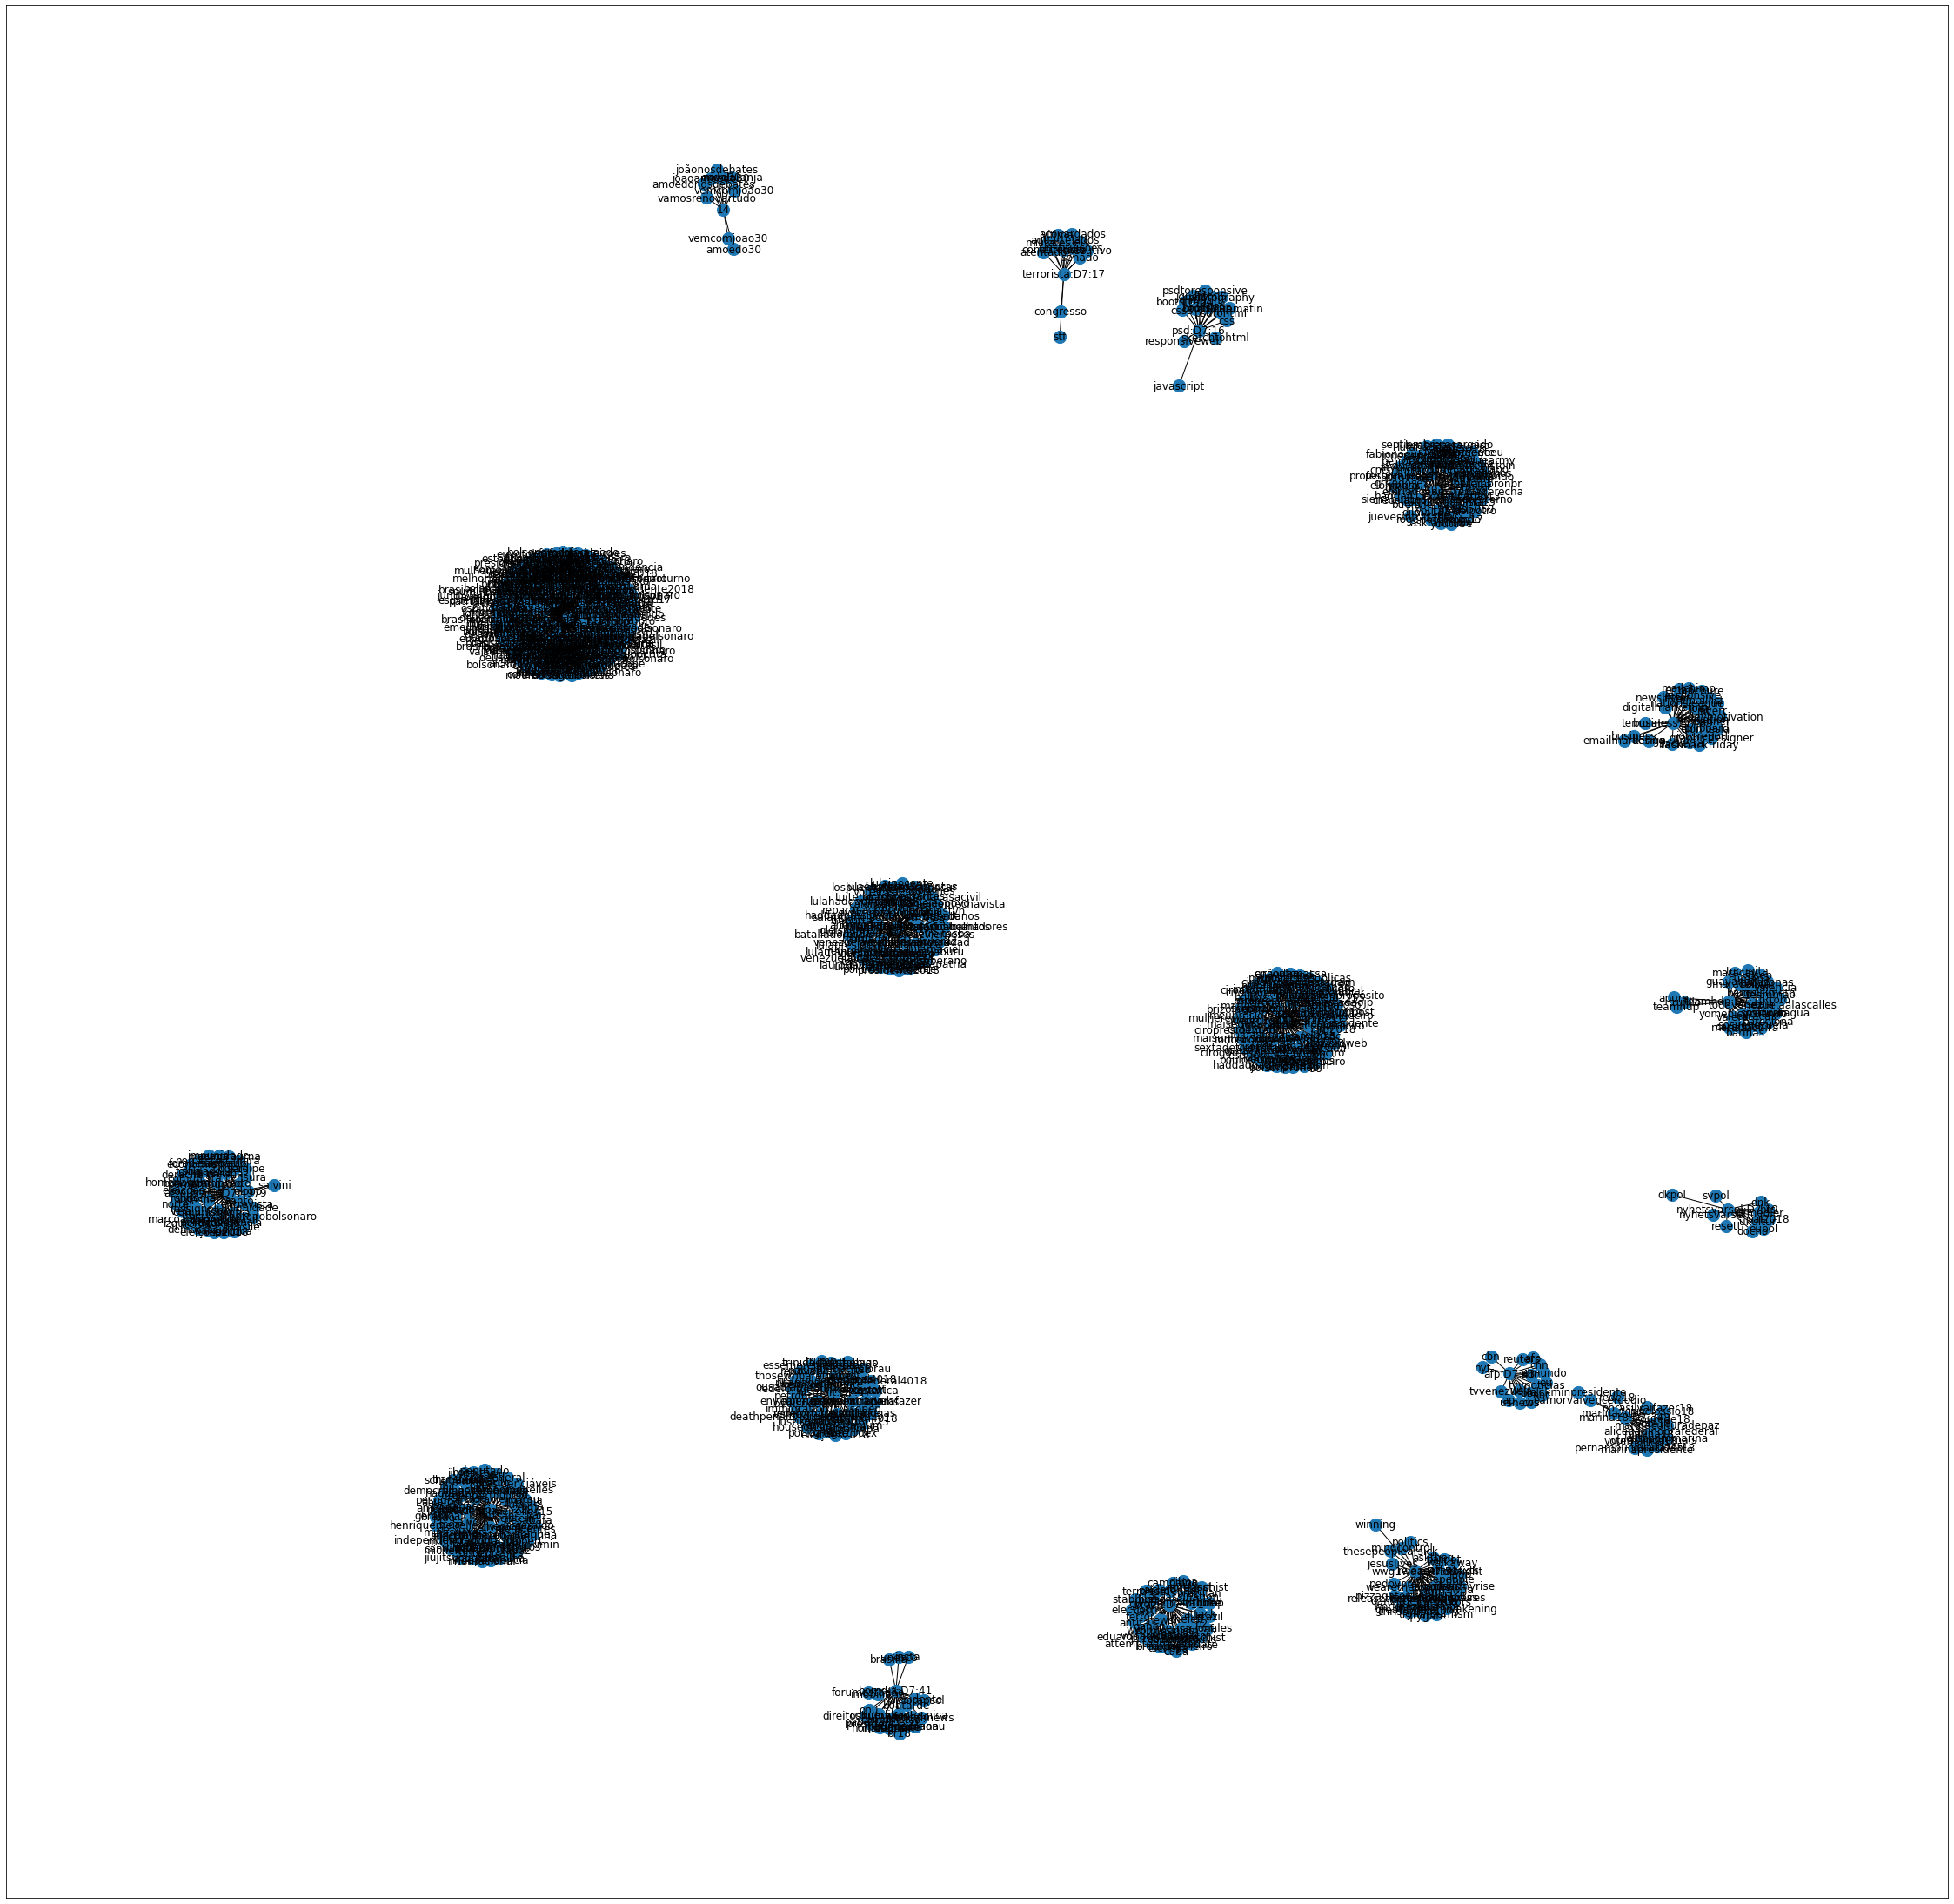

In [ ]:
plt.figure(figsize=(40, 40))
nx.draw_networkx(graph_comm[6],with_labels=True,node_size=200)
plt.show()
nx.write_graphml(graph_comm[6],'random_onetwo.graphml')

## Adding users in labels and as attribute:

In [ ]:
new_user_h=hashdf.copy()
user_df=[]
#print(new_user_h[0])
for i in new_user_h:
    i.head(2)
    user_to_hashtags_dict=dict(i[['user.id_str','hashtags']].values) 
    user_df.append(user_to_hashtags_dict)

In [ ]:
[*user_df[1].items(),][:3]
newlist=[]
user=[]
for i in new_user_h:
    temphas=i['hashtags'].fillna(0)
    newlist.append(temphas)
    user.append(i['user.id_str'])
    

finuserlist=[]
for i in range(len(user)):
    finuser=[]
    for j,k in zip(user[i],newlist[i]):
        if k!=0:
            finuser.append(j)
    finuserlist.append(finuser)
    
newY=[]
for i in newlist:
    Y=[y for y in i if y != 0] 
    newY.append(Y)
len(finuserlist)

7

In [ ]:
user_count_lst=[]

for i in range(len(finuserlist)):
    dc={}
    for j,k in zip(finuserlist[i],newY[i]):
        for (x,y) in fin_list[i].items():
            
            for t in y:
                if (x in k) and (t in k):
                    if x not in dc:
                        dc[x]=[j]
                    else:
                        dc[x].append(j)
    user_count_lst.append(dc)
    
tp_list=[]
for i in user_count_lst:
    tp_dict={}
    for j,k in i.items():
    #print(i)
        m=[*set(k),]
        #print(m)
        l=len(m)
        #print(l)
        tp_dict[j]=l
    tp_list.append(tp_dict)
    

In [ ]:
tp_list[1]

{'lulalivre': 212,
 'bolsonaropresidente17': 1169,
 'brasil': 516,
 'ciro12': 1034,
 'ondalaranja': 411,
 'eleições2018': 349,
 'direitaconservadora': 2,
 'elpais': 1,
 'globolixo': 31,
 'forapt': 129,
 'machista': 1}

In [ ]:
## labels including number of users:


mapping=[]
mapping=labelist
#print(labelist[1])

for i in range(len(labelist)):
    for (k,v),(x,y) in zip(labelist[i].items(),tp_list[i].items()):
        v=v+f':D{i+1}'+':'+str(y)
        labelist[i][k]=v
        
print(labelist[0])
for i,j in zip(range(len(graph_comm)),range(len(mapping))):
    graph_comm[i]=nx.relabel_nodes(graph_comm[i],mapping[j])

{0: 'ciro12', 1: 'lulalivre', 2: 'bolsonaropresidente17', 3: 'brasil', 4: 'ondalaranja', 5: 'globolixo', 6: 'elpais', 7: 'eleições2018', 8: 'forapt', 9: 'machista', 10: 'direitaconservadora'}
{0: 'faitsdivers:D1:464', 1: 'ciro12:D1:1006', 2: 'bolsonaropresidente17:D1:61', 3: 'vamosrenovartudo:D1:91', 4: 'fuerzalula:D1:254', 5: 'falta3mesespradezembroeeu:D1:1558', 6: 'enquete:D1:562', 7: 'lulalivre:D1:314', 8: 'obrasilfelizdenovo:D1:16', 9: 'lulapreso:D1:9', 10: 'dilma:D1:1', 11: 'eleições2018:D1:20', 12: 'psdb:D1:1', 13: 'miserable:D1:1', 14: 'boatarde:D1:3'}


## Graph between day1 and day2 communities:

In [ ]:
print(graph_comm[1].edges)
len(comm_list[1]) 

[('ciropresidente12', 'ciro12:D2:212'), ('ciro12:D2:212', 'semlulaéciro'), ('ciro12:D2:212', 'incendiomuseunacional'), ('ciro12:D2:212', 'ciro12'), ('ciro12:D2:212', 'asminaciram'), ('ciro12:D2:212', 'lula'), ('ciro12:D2:212', 'cirãodamassa'), ('ciro12:D2:212', 'ciropresidente'), ('ciro12:D2:212', 'bolsonaronão'), ('ciro12:D2:212', 'eleicoes2018'), ('ciro12:D2:212', 'euquerociro'), ('ciro12:D2:212', 'cironouol'), ('ciro12:D2:212', 'folha'), ('ciro12:D2:212', 'vempramassa'), ('ciro12:D2:212', 'mude'), ('ciro12:D2:212', 'esquerdaunida'), ('ciro12:D2:212', 'geraldo45'), ('ciro12:D2:212', 'ciropdt'), ('ciro12:D2:212', 'cirogomespresidentepdt'), ('ciro12:D2:212', 'cirogomespresidente'), ('ciro12:D2:212', 'cirogomes2018'), ('ciro12:D2:212', 'ciro2018'), ('ciro12:D2:212', 'ciro12pdt'), ('ciro12:D2:212', 'ciropresidentepdt'), ('ciro12:D2:212', 'cirogomespresidente12'), ('ciro12:D2:212', 'cirogomes12'), ('ciro12:D2:212', 'aovivo'), ('ciro12:D2:212', 'haddadpresidente'), ('ciro12:D2:212', 'cirog

457

In [ ]:
centlist[0]

{'lulalivre': 0,
 'vamosrenovartudo': 1,
 'bolsonaropresidente17': 2,
 'dilma': 3,
 'fuerzalula': 4,
 'lulapreso': 5,
 'eleições2018': 6,
 'bolsonaro': 7,
 'psdb': 8,
 'ciro12': 9,
 'juventudalavanguardia': 10,
 'falta3mesespradezembroeeu': 11,
 'miserable': 12,
 'boatarde': 13,
 'faitsdivers': 14,
 'onu': 15}

In [ ]:
'''
fin_list=[]
for i,j in zip(comm_list,centlist):
    #t=[*(set([*i.values(),])),]
    fin_dict={}
    for k,v in j.items():
        for l,m in i.items():
            if v==m:
                if k not in fin_dict:
                    fin_dict[k]=[l]
                else:
                    fin_dict[k].append(l)
    fin_list.append(fin_dict)
    
fin_list[1]'''

{'ciro12': ['ciropresidente12',
  'semlulaéciro',
  'incendiomuseunacional',
  'ciro12',
  'asminaciram',
  'cirãodamassa',
  'ciropresidente',
  'eleicoes2018',
  'euquerociro',
  'cironouol',
  'folha',
  'vempramassa',
  'mude',
  'mpf',
  'ciropdt',
  'cirogomespresidentepdt',
  'cirogomespresidente',
  'cirogomes2018',
  'ciro2018',
  'ciro12pdt',
  'ciropresidentepdt',
  'cirogomespresidente12',
  'cirogomes12',
  'aovivo',
  'iurd',
  'nytimes',
  'cnbb',
  'bdf',
  'jovempan',
  'jornalggn',
  'washingtonpost',
  'elpais',
  'unitednations',
  'g1',
  'derspiegel',
  'band',
  'mst',
  'stf',
  'rtp',
  'cirogomes',
  'uolnasurnas',
  'mulheresunidascontrabolsonaro',
  'cironeles',
  'todoscomciro',
  'pdt',
  'bolsonaronao',
  'vote12',
  'semlulaeciro',
  'brasilcomciro',
  'centraldaseleições',
  'asminasciram',
  'falta3mesespradezembroeeu',
  'sbt',
  'movercomciro',
  'uol',
  'globonews',
  'elasciram',
  'petrobras',
  'sabatina',
  'vaicorinthians',
  'fup',
  'nocaute

In [ ]:
'''final_list=[]
for i,j in zip(fin_list,labelist):
    final={}
    for (k,v),(m,n) in zip(i.items(),j.items()):
        final[n]=v
    final_list.append(final)
print(final_list[1])'''
        

{'ciro12:D2:7586': ['ciropresidente12', 'semlulaéciro', 'incendiomuseunacional', 'ciro12', 'asminaciram', 'cirãodamassa', 'ciropresidente', 'eleicoes2018', 'euquerociro', 'cironouol', 'folha', 'vempramassa', 'mude', 'mpf', 'ciropdt', 'cirogomespresidentepdt', 'cirogomespresidente', 'cirogomes2018', 'ciro2018', 'ciro12pdt', 'ciropresidentepdt', 'cirogomespresidente12', 'cirogomes12', 'aovivo', 'iurd', 'nytimes', 'cnbb', 'bdf', 'jovempan', 'jornalggn', 'washingtonpost', 'elpais', 'unitednations', 'g1', 'derspiegel', 'band', 'mst', 'stf', 'rtp', 'cirogomes', 'uolnasurnas', 'mulheresunidascontrabolsonaro', 'cironeles', 'todoscomciro', 'pdt', 'bolsonaronao', 'vote12', 'semlulaeciro', 'brasilcomciro', 'centraldaseleições', 'asminasciram', 'falta3mesespradezembroeeu', 'sbt', 'movercomciro', 'uol', 'globonews', 'elasciram', 'petrobras', 'sabatina', 'vaicorinthians', 'fup', 'nocaute', 'escutecirogomes', 'cirogomesnoestadao', 'vejanaseleições', 'katiaabreu', 'estadao', 'fichalimpa', 'ideb', 'cir

### Creating graph between the two days for central node of communities:

In [ ]:

mn=[]
#w_dict={}
for i in range(len(final_list)):
    if i>len(final_list)-1:
        break
    for u,v in final_list[i].items():
        for k in v:
            for m,n in final_list[i+1].items():
                #print(i)
                for p in n:
                    if p==k:
                        mn.append((u,m))
                        
    print(mn)
#print(mn)                       

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[('onu:D1:36', 'bolsonaropresidente17:D2:2609'), ('onu:D1:36', 'lulalivre:D2:555'), ('onu:D1:36', 'ciro12:D2:7610'), ('onu:D1:36', 'lulalivre:D2:555'), ('onu:D1:36', 'globolixo:D2:158'), ('onu:D1:36', 'lulalivre:D2:555'), ('onu:D1:36', 'lulalivre:D2:555'), ('onu:D1:36', 'ciro12:D2:7610'), ('ciro12:D1:10031', 'ciro12:D2:7610'), ('ciro12:D1:10031', 'ciro12:D2:7610'), ('ciro12:D1:10031', 'ciro12:D2:7610'), ('ciro12:D1:10031', 'ciro12:D2:

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5

KeyboardInterrupt: 

In [ ]:
len(final_list)

7

In [ ]:
#### adding weights to the graph as number of similar hashtags:
mn=[]
w_dict={}
for i in range(len(final_list)):
    if i>len(final_list)-1:
        print('££££££££££££££££££££££££££££££££££££££')
        break
    for u,v in final_list[i].items():
        for k in v:
            for m,n in final_list[i+1].items():
                print(i)
                for p in n:
                    if p==k:
                        if (u,m) not in mn:
                            mn.append((u,m))
                            
                        if (u,m) not in w_dict:
                            w_dict[(u,m)]=[(u,m)]
                        else:
                            w_dict[(u,m)].append((u,m))
                            
                        
    #print(mn)
    print('dictionary************',w_dict.items())
#print(mn)                       

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
dictionary************ dict_items([(('onu:D1:36', 'bolsonaropresidente17:D2:2609'), [('onu:D1:36', 'bolsonaropresidente17:D2:2609')]), (('onu:D1:36', 'lulalivre:D2:555'), [('onu:D1:36', 'lulalivre:D2:555'), ('onu:D1:36', 'lulalivre:D2:555'), ('onu:D1:36', 'lulalivre:D2:555'), ('onu:D1:36', 'lulalivre:D2:555')]), (('onu:D1:36', 'ciro12:D2:7610'), [('onu:D1:36', 'ciro12:D2:7610'), ('onu:D1:36', 'ciro12:D2:7610')]), (('onu:D1:36', 'globolixo:D2:158'), [('onu:D1:36', 'globolixo:D2:158')]), (('ciro12:D1:10031', 'ciro12:D2:7610'), [('ciro12:D1:10031', 'ciro12:D2:7610'), ('c

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


IndexError: list index out of range

In [ ]:
######USING JACCARD FORMULA FOR WEIGHTS:########################### 
#### adding weights to the graph as number of similar hashtags:
mn=[]
w_dict={}
for i in range(len(final_list)):
    if i>len(final_list):
        print('££££££££££££££££££££££££££££££££££££££')
        exit()
        break
        
    for u,v in final_list[i].items():
        for k in v:
            for m,n in final_list[i+1].items():
                print(i)
                for p in n:
                    if p==k:
                        s1=set(v)
                        s2=set(n)
                        Jaccard=float(len(s1.intersection(s1))/len(s1.union(s2)))
                        if (u,m) not in mn:
                            mn.append((u,m))

                        if (u,m) not in w_dict:
                            w_dict[(u,m)]=[Jaccard]
                        else:
                            w_dict[(u,m)].append(Jaccard)
                            
print(len(mn))                

Streaming output truncated to the last 5000 lines.
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
2

In [ ]:
w_count={}
for i,j in w_dict.items():
    count=0
    l=len(j)
    s=sum(j)
    w_count[i]=s/l

In [ ]:
#########GRAPH USING JACCARD AS WEIGHTS: ################

jacgraph=nx.Graph()

jacgraph.add_edges_from(mn)
nx.set_edge_attributes(jacgraph, values = w_count, name = 'weight')

nx.write_gexf(jacgraph, 'jacgraph_shape' +'.gexf')

In [ ]:
w_count={}
for i,j in w_dict.items():
    count=0
    l=len(j)
    w_count[i]=l

In [ ]:
#print([*w_count.values(),])
#uniq=[*set(mn),]
#print(len(mn))
#nx.set_edge_attributes(maingraph, values = w_count, name = 'weight')
#nx.write_graphml(maingraph,'maingraph_attr_user1.graphml')

In [ ]:
maingraph=nx.Graph()

maingraph.add_edges_from(mn)
nx.set_edge_attributes(maingraph, values = w_count, name = 'weight')
#plt.figure(figsize=(250, 150))
#nx.draw_networkx(maingraph,with_labels=True,node_size=500)
#plt.show()
nx.write_gexf(maingraph, 'g_test_shape' +'.gexf')
#nx.write_graphml(maingraph,'maingraph_attr_user.graphml')

## Edge weights:

In [ ]:
preds = nx.jaccard_coefficient(maingraph)
w_dict={}
c=0
for u, v, p in preds:
    #print(f"({u}, {v}) -> {p:.8f}")
    c=c+1
    
#print(c)
len(maingraph.edges())    

278

In [ ]:
print(len(mn))
print(len([*nx.preferential_attachment(maingraph,mn),]))

1658
1658


In [ ]:
'''pr = nx.pagerank(maingraph, alpha=0.9)
print(pr)'''

'pr = nx.pagerank(maingraph, alpha=0.9)\nprint(pr)'

## Adding NODE attribute:Number of tweets:

In [ ]:
comm_count_lst=[]
for i in range(len(fin_list)):
    comm_count={}
    for k,v in fin_list[i].items():
        count=0
        for x in v:
            for j in hashlist[i]:
                if (x in j) and (k in j) :
                    if k not in comm_count:
                        comm_count[k]=1
                    else:
                        comm_count[k]+=1
    comm_count_lst.append(comm_count)          

In [ ]:
comm_count_lst[1]

{'eleições2018': 543,
 'lulalivre': 325,
 'obrasilfelizdenovo': 168,
 'mito': 27,
 'museu': 74,
 'bolsonaropresidente17': 2762,
 'ondalaranja': 608,
 'ciro12': 7705,
 'machista': 83,
 'lula': 126}

In [ ]:
comm_lst_fin=[]
for i in range(len(comm_count_lst)):
    abc={}
    for (k,v),(x,y) in zip(comm_count_lst[i].items(),labelist[i].items()):
        abc[y]=v
    
    comm_lst_fin.append(abc)  

In [ ]:
comm_lst_fin[0]

{'obrasilfelizdenovo:D1': 644,
 'ciro12:D1': 10005,
 'bolsonaropresidente17:D1': 4173,
 'dilma:D1': 16,
 'juventudalavanguardia:D1': 172,
 'fuerzalula:D1': 83,
 'novo30:D1': 247,
 'falta3mesespradezembroeeu:D1': 64,
 'lulapreso:D1': 38,
 'psdb:D1': 23,
 'eleições2018:D1': 460,
 'presidente:D1': 869,
 'onu:D1': 36,
 'miserable:D1': 10,
 'boatarde:D1': 11,
 'faitsdivers:D1': 12}

In [ ]:
from collections import defaultdict


super_dict = defaultdict(set)  # uses set to avoid duplicates

for d in comm_lst_fin:
    for k, v in d.items():  # use d.iteritems() in python 2
        super_dict[k].add(v)

In [ ]:
super_dict.items()

nested_dict=dict(super_dict)
nested_dict

{'obrasilfelizdenovo:D1': {644},
 'ciro12:D1': {10005},
 'bolsonaropresidente17:D1': {4173},
 'dilma:D1': {16},
 'juventudalavanguardia:D1': {172},
 'fuerzalula:D1': {83},
 'novo30:D1': {247},
 'falta3mesespradezembroeeu:D1': {64},
 'lulapreso:D1': {38},
 'psdb:D1': {23},
 'eleições2018:D1': {460},
 'presidente:D1': {869},
 'onu:D1': {36},
 'miserable:D1': {10},
 'boatarde:D1': {11},
 'faitsdivers:D1': {12},
 'eleições2018:D2': {543},
 'lulalivre:D2': {325},
 'obrasilfelizdenovo:D2': {168},
 'mito:D2': {27},
 'museu:D2': {74},
 'bolsonaropresidente17:D2': {2762},
 'ondalaranja:D2': {608},
 'ciro12:D2': {7705},
 'machista:D2': {83},
 'lula:D2': {126}}

In [ ]:
## Adding the node attributes:

maingraph=nx.Graph()
attrs={}
maingraph.add_nodes_from(nested_dict.keys())
print(maingraph.nodes)
for i in range(len(maingraph.nodes)):
    for k,v in nested_dict.items():
        attrs [i]=  {"attr1": v}
print(attrs.items())
maingraph.add_edges_from(mn)
nx.set_node_attributes(maingraph, attrs)
nx.write_graphml(maingraph,'maingraph_attr.graphml')

['obrasilfelizdenovo:D1', 'ciro12:D1', 'bolsonaropresidente17:D1', 'dilma:D1', 'juventudalavanguardia:D1', 'fuerzalula:D1', 'novo30:D1', 'falta3mesespradezembroeeu:D1', 'lulapreso:D1', 'psdb:D1', 'eleições2018:D1', 'presidente:D1', 'onu:D1', 'miserable:D1', 'boatarde:D1', 'faitsdivers:D1', 'eleições2018:D2', 'lulalivre:D2', 'obrasilfelizdenovo:D2', 'mito:D2', 'museu:D2', 'bolsonaropresidente17:D2', 'ondalaranja:D2', 'ciro12:D2', 'machista:D2', 'lula:D2']
dict_items([(0, {'attr1': {126}}), (1, {'attr1': {126}}), (2, {'attr1': {126}}), (3, {'attr1': {126}}), (4, {'attr1': {126}}), (5, {'attr1': {126}}), (6, {'attr1': {126}}), (7, {'attr1': {126}}), (8, {'attr1': {126}}), (9, {'attr1': {126}}), (10, {'attr1': {126}}), (11, {'attr1': {126}}), (12, {'attr1': {126}}), (13, {'attr1': {126}}), (14, {'attr1': {126}}), (15, {'attr1': {126}}), (16, {'attr1': {126}}), (17, {'attr1': {126}}), (18, {'attr1': {126}}), (19, {'attr1': {126}}), (20, {'attr1': {126}}), (21, {'attr1': {126}}), (22, {'attr

In [ ]:
graphlist=[]
for i in comm_list:
    g=nx.Graph()
    for k, v in i.items():
        g.add_edges_from(([(k, v)]))
    graphlist.append(g)

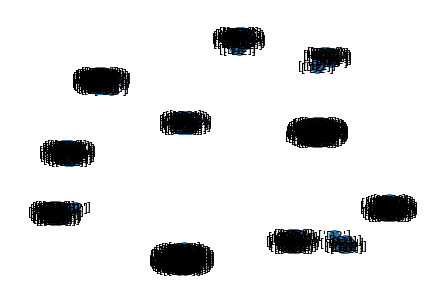

In [ ]:
nm = nx.get_node_attributes(graphlist[1], 'labels') 
nx.draw(graphlist[1],labels=nm,node_size=100)
plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as pex

In [ ]:
node_list=pd.read_csv("drive/My Drive/x_axis.csv")
node_list.head()

,SOURCE,DAYS
0,ditaduranuncamais:D1:45,D1
1,ditaduranuncamais:D1:45,D1
2,ditaduranuncamais:D1:45,D1
3,elenão:D2:45,D2
4,fodamsecomunistas:D2:67,D2


In [ ]:
sankplt = pd.read_csv("drive/My Drive/whole_year1.csv")

sankplt.head()

,Source,Target,Weight
0,bolsonaropresidente17:D1:6990,bolsonaropresidente17:D2:4067,46
1,bolsonaropresidente17:D2:4067,bolsonaropresidente17:D3:2595,40
2,ciro12:D2:10045,ciro12:D1:5899,29
3,ciro12:D2:10045,ciro12:D3:7634,38
4,vamosrenovartudo:D2:369,ondalaranja:D3:607,28


In [ ]:

all_nodes = list(set(sankplt.Source.values.tolist() + sankplt.Target.values.tolist()))

source_indices = [all_nodes.index(measure) for measure in sankplt.Source] 
target_indices = [all_nodes.index(country) for country in sankplt.Target] 

fig = go.Figure(data=[go.Sankey(
                        # Define nodes
                        node = dict(
                          label =  all_nodes,
                          color =  "red"
                        ),
                        
                        # Add links
                        link = dict(
                          source =  source_indices,
                          target =  target_indices,
                          value =  sankplt.Weight,
                        )
                    )
                ])

fig.update_layout(title_text="Hashtag Migration between source community to destination",height=1500,
                  font_size=8)
fig.show()

In [ ]:
all_nodes = sankplt.Source.values.tolist() + sankplt.Target.values.tolist()

source_indices = [all_nodes.index(measure) for measure in sankplt.Source] 
target_indices = [all_nodes.index(country) for country in sankplt.Target] 


fig = go.Figure(data=[go.Sankey(
                        node = dict(
                              pad = 20,
                              thickness = 20,
                              line = dict(color = "black", width = 1.0),
                              label =  all_nodes,
                        ),

                        link = dict(
                              source =  source_indices,
                              target =  target_indices,
                              value =  sankplt.Weight,
                        )
                    )
                ])

fig.update_layout(title_text="Hashtags Flow of Narrative",
                  height=3500,
                  font_size=10)
fig.show()

In [ ]:
all_nodes = sankplt.Target.values.tolist() + sankplt.Source.values.tolist()

source_indices = [all_nodes.index(country) for country in sankplt.Target] 
target_indices = [all_nodes.index(measure) for measure in sankplt.Source] 

colors = pex.colors.qualitative.D3 

node_colors_mappings = dict([(node,np.random.choice(colors)) for node in all_nodes]) 

node_colors = [node_colors_mappings[node] for node in all_nodes] 
edge_colors = [node_colors_mappings[node] for node in sankplt.Target] 

fig = go.Figure(data=[
                    go.Sankey(
                        node = dict(
                                  pad = 20,
                                  thickness = 20,
                                  line = dict(color = "black", width = 1.0),
                                  label =  all_nodes,
                                  color =  node_colors, 
                                ),

                        link = dict(
                              source =  source_indices,
                              target =  target_indices,
                              value =  sankplt.Weight,
                              color = edge_colors, 
                              )
                            )
                        ])

fig.update_layout(title_text="Hashtags Flow of Narrative",
                  height=3500,
                  font_size=10)
fig.show()


In [ ]:
all_nodes = nz_migration.Source.values.tolist() + sankplt.Target.values.tolist()

source_indices = [all_nodes.index(source) for source in sankplt.Source] 
target_indices = [all_nodes.index(dest) for dest in sankplt.Target] 

colors = pex.colors.qualitative.D3

node_colors_mappings = dict([(node,np.random.choice(colors)) for node in all_nodes])

node_colors = [node_colors_mappings[node] for node in all_nodes]
edge_colors = [node_colors_mappings[node] for node in sankplt.Source] 

fig = go.Figure(data=[
                    go.Sankey(
                        node = dict(
                                pad = 20,
                                thickness = 20,
                                line = dict(color = "black", width = 1.0),
                                label =  all_nodes,
                                color =  node_colors,
                               ),
                        link = dict(
                               source =  source_indices,
                               target =  target_indices,
                               value =  sankplt.Weight,
                               color = edge_colors
                               )
                         )
                    ])

fig.update_layout(title_text="Hashtags Flow of Narrative",
                  height=3500,
                  font=dict(size = 10, color = 'white'),
                  plot_bgcolor='black', paper_bgcolor='black')

fig.show()